In [420]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt

# Moving files
import os
import glob
import shutil
import datetime
import time

# Python Copy File - Sample Code
        
from shutil import copyfile
from sys import exit

import seaborn as sns
# import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [421]:
# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone") 
cwd = os.getcwd()


Data_folder = "./PortfolioRisk/"
file_list = os.listdir(Data_folder)

goodlist = [file for file in file_list if file.endswith(".csv")]

In [422]:
# make a list of the colums you want to include
column_list = ["Date", "Adj Close"]

# empy list of dataframes
df_list = []

# for every file in the cleaned flist
for file in goodlist:
    print("Reading file " + file + "....")
    # temporary d that reads every csv in this path and the file, following the column list criteria
    df_tmp = pd.read_csv(Data_folder + file, usecols=column_list)
    df_tmp.rename(columns = {'Adj Close':file[:4]}, inplace = True)  # Rename price column by filename
    df_list.append(df_tmp)

#compbine all dataframes into 1 datafrmae
# df = pd.concat(df_list)

Reading file AAPLstock199907_202007.csv....
Reading file ADOBEstock199907_202007.csv....
Reading file BZHstock199907_202007.csv....
Reading file CHTRstock199907_202007.csv....
Reading file CIENstock199907_202007.csv....
Reading file DVAstock199907_202007.csv....
Reading file EVRGstock199907_202007.csv....
Reading file FCstock199907_202007.csv....
Reading file FELEstock199907_202007.csv....
Reading file ITWstock199907_202007.csv....
Reading file KMBstock199907_202007.csv....
Reading file MWAstock199907_202007.csv....
Reading file NVECstock199907_202007.csv....
Reading file OSISstock199907_202007.csv....
Reading file PNRstock199907_202007.csv....
Reading file S&P500_199907_202007.csv....
Reading file TPXstock199907_202007.csv....
Reading file VIAVIstock199907_202007.csv....


In [423]:
df = pd.merge(df_list[0],df_list[1], how='inner', on='Date')
df = pd.merge(df,df_list[2], how='inner', on='Date')
df = pd.merge(df,df_list[3], how='inner', on='Date')
df = pd.merge(df,df_list[4], how='inner', on='Date')
df = pd.merge(df,df_list[5], how='inner', on='Date')
df = pd.merge(df,df_list[6], how='inner', on='Date')
df = pd.merge(df,df_list[7], how='inner', on='Date')
df = pd.merge(df,df_list[8], how='inner', on='Date')
df = pd.merge(df,df_list[9], how='inner', on='Date')
df = pd.merge(df,df_list[10], how='inner', on='Date')
df = pd.merge(df,df_list[11], how='inner', on='Date')
df = pd.merge(df,df_list[12], how='inner', on='Date')
df = pd.merge(df,df_list[13], how='inner', on='Date')
df = pd.merge(df,df_list[14], how='inner', on='Date')
df = pd.merge(df,df_list[15], how='inner', on='Date')
df = pd.merge(df,df_list[16], how='inner', on='Date')
df = pd.merge(df,df_list[17], how='inner', on='Date')


df.set_index('Date',inplace=True)
# df = df.pct_change()
spx = df['S&P5']
df = df.drop(columns=['MWAs', 'S&P5'])

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df_efficient = df
df_efficient = df_efficient.pct_change()
# df_efficient = df_efficient[-1825:]

In [395]:
# plt.figure(figsize=(14, 7))
# for c in df.columns.values:
#     plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
# plt.legend(loc='upper left', fontsize=12)
# plt.ylabel('price in $')

In [396]:
# returns = df.pct_change()
# plt.figure(figsize=(14, 7))
# for c in returns.columns.values:
#     plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
# plt.legend(loc='upper right', fontsize=12)
# plt.ylabel('daily returns')

In [397]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [398]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((16,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(16)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [399]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0

In [400]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.19


             AAPL   ADOB  BZHs  CHTR  CIEN  DVAs  EVRG  FCst  FELE   ITWs  \
allocation  13.86  14.95  1.17  3.21  1.35  0.58  8.02  5.67  6.23  12.28   

             KMBs  NVEC  OSIS  PNRs  TPXs  VIAV  
allocation  18.26  3.06  7.63  1.52  1.23   1.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.18


             AAPL  ADOB  BZHs   CHTR  CIEN   DVAs   EVRG  FCst  FELE  ITWs  \
allocation  12.07  1.97  4.56  10.82   4.2  10.61  14.63  0.25  1.56  9.25   

            KMBs  NVEC  OSIS  PNRs  TPXs  VIAV  
allocation  14.7  2.95  3.28   2.0  4.26   2.9  


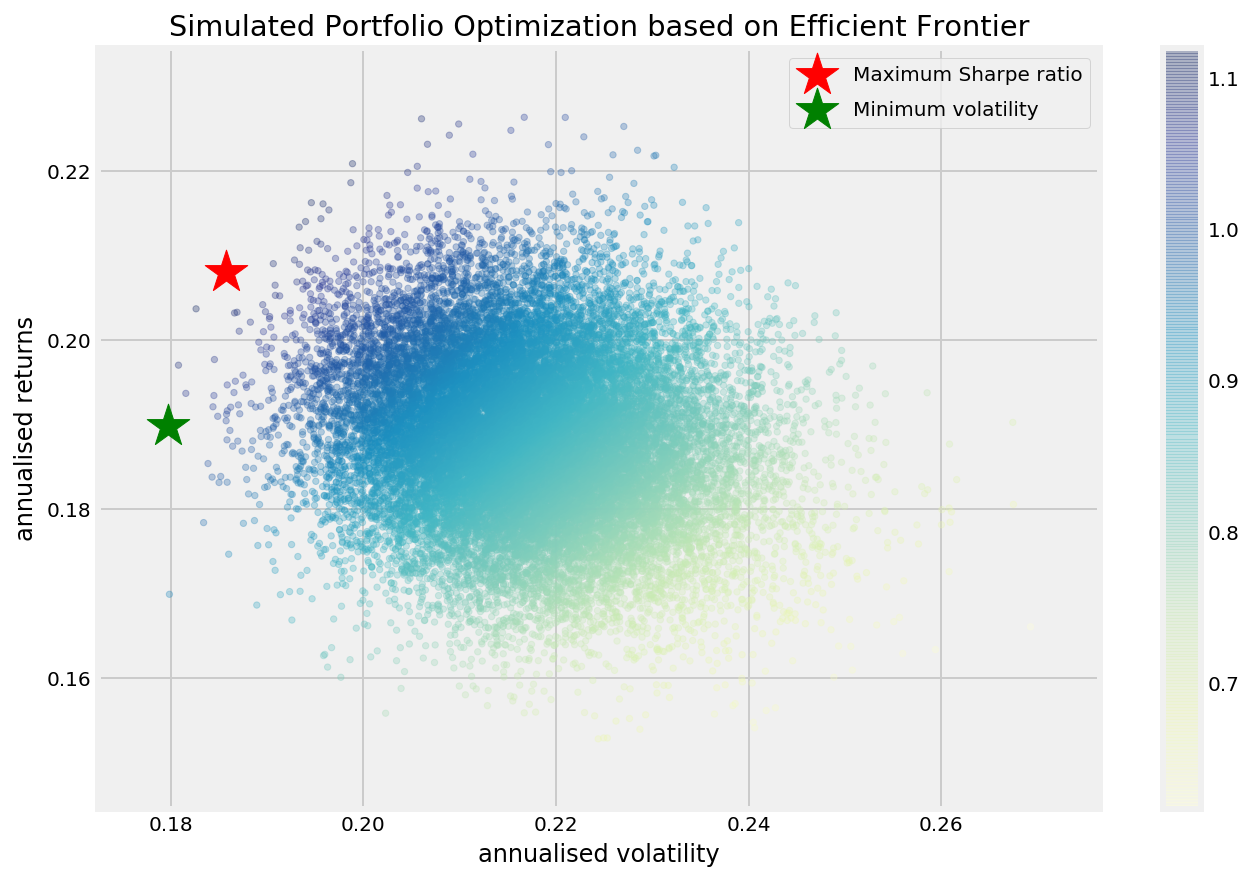

In [401]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [402]:
df_efficient = df_efficient.replace([np.inf, -np.inf], np.nan)
df_efficient = df_efficient.dropna()
# msr_weights = np.array([.1386, .1495, .0117, .0321, .0135, .0058, .0802, .0567, .0623, .1228, .1826, .0306, .0763, .0152, .0123, .01])


In [403]:
numstocks = 16


# Finish defining the portfolio weights as a numpy array
# msr_weights = np.array([.2203, .2139, .0029, .2402, .0603, .0248, .1529, .0499, .0346])
msr_weights = np.array([.1386, .1495, .0117, .0321, .0135, .0058, .0802, .0567, .0623, .1228, .1826, .0306, .0763, .0152, .0123, .01])



port_ret = df_efficient.mul(msr_weights, axis=1)


In [404]:
# Calculate the portfolio returns
df_efficient['MSR_Portfolio'] = df_efficient.mul(msr_weights, axis=1).sum(axis=1)
# df = ((1+df).cumprod()-1)

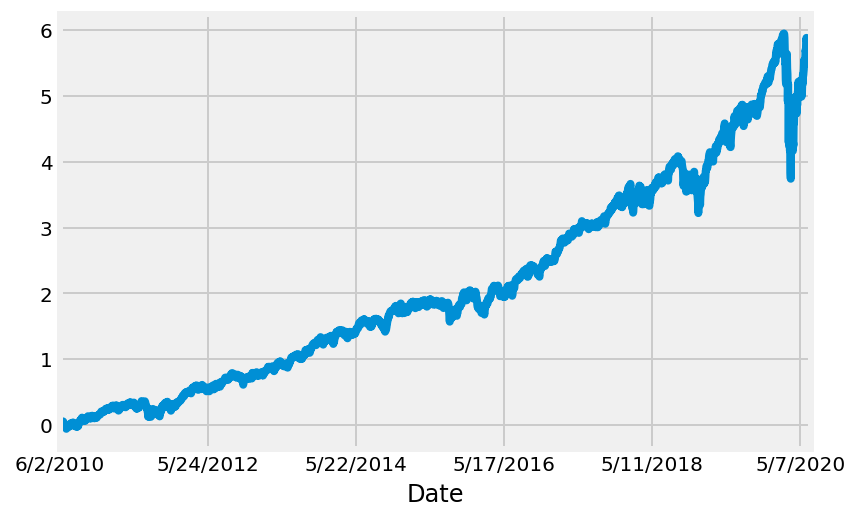

In [405]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+df_efficient["MSR_Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [406]:
gmv_weights = np.array([0.1207, 0.0197, 0.0456, .1082, .042, .1061, .1463, .0025, .0156, .0925, .147, .0295, .0328, .02, .0426, .029])

df_efficient['GMV_Portfolio'] = df_efficient.iloc[:, 0:numstocks].mul(gmv_weights, axis=1).sum(axis=1)
# df_efficient = ((1+df_efficient).cumprod()-1)

In [407]:

portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

df_efficient['EW_Portfolio'] = df_efficient.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
df_efficient = ((1+df_efficient).cumprod()-1)


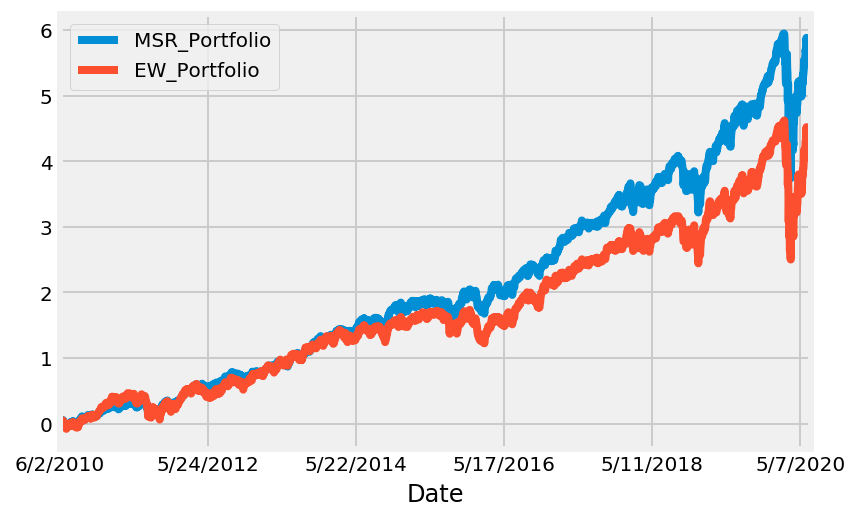

In [408]:
df_efficient[['MSR_Portfolio','EW_Portfolio' ]].plot()


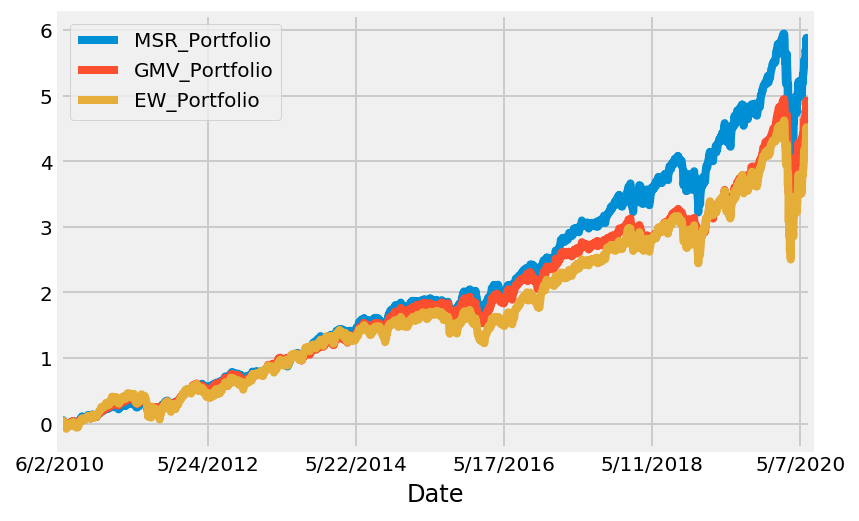

In [409]:
df_efficient[['MSR_Portfolio','GMV_Portfolio','EW_Portfolio' ]].plot()

In [410]:
df_efficient.tail()

,AAPL,ADOB,BZHs,CHTR,CIEN,DVAs,EVRG,FCst,FELE,ITWs,KMBs,NVEC,OSIS,PNRs,TPXs,VIAV,MSR_Portfolio,GMV_Portfolio,EW_Portfolio
Date,,,,,,,,,,,,,,,,,,,
6/24/2020,10.162183,12.435418,-0.595798,13.158026,2.579018,1.450159,3.061094,2.108664,2.956565,3.763605,2.359475,0.853065,1.812573,0.970441,1.247403,1.027702,5.666761,4.624003,4.136619
6/25/2020,10.310368,12.599440,-0.602521,13.214604,2.588433,1.460317,3.056967,2.140969,3.038153,3.817996,2.380911,0.833420,1.859527,0.978585,1.210891,1.035925,5.725901,4.646518,4.157632
6/26/2020,9.962848,12.287270,-0.612185,12.998606,2.595831,1.398730,2.997123,2.039648,2.950911,3.729505,2.334628,0.835568,1.721381,0.943835,1.147309,1.055659,5.578825,4.541406,4.060734
6/29/2020,10.215505,12.202614,-0.578151,13.192307,2.574311,1.451111,3.070724,2.083700,3.209404,3.833029,2.396989,0.812240,1.865347,1.029081,1.269437,1.081972,5.719465,4.673162,4.195719
6/30/2020,10.309127,12.548397,-0.576891,13.215162,2.642233,1.512381,3.078290,2.142438,3.242524,3.959244,2.443273,0.897880,1.896391,1.062746,1.264715,1.095128,5.823866,4.743061,4.270593


In [386]:
df = df.pct_change()
df['MSR_Portfolio'] = df.mul(msr_weights, axis=1).sum(axis=1)


# Set the simulation parameters
mu = np.mean(df['MSR_Portfolio'])
vol = np.std(df['MSR_Portfolio'])
T = 252
S0 = 10

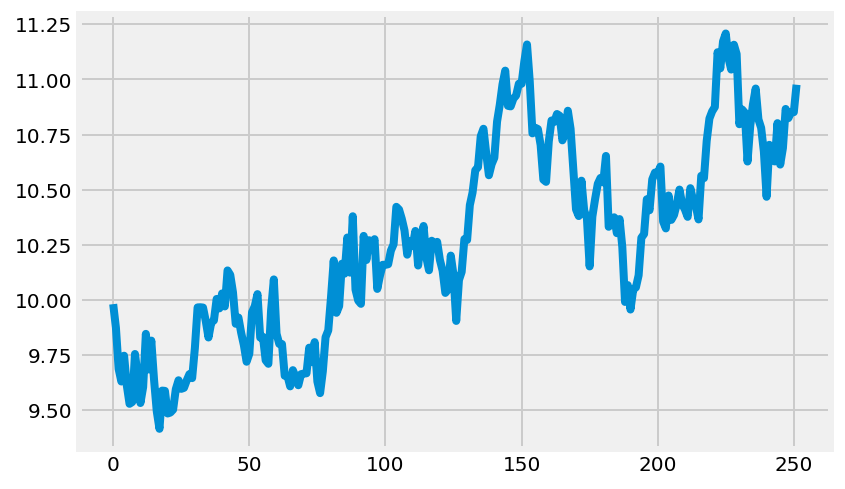

In [387]:
# Add one to the random returns
rand_rets = np.random.normal(mu,vol,T) + 1

# Forecasted random walk
forecasted_values = S0*(rand_rets.cumprod())

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

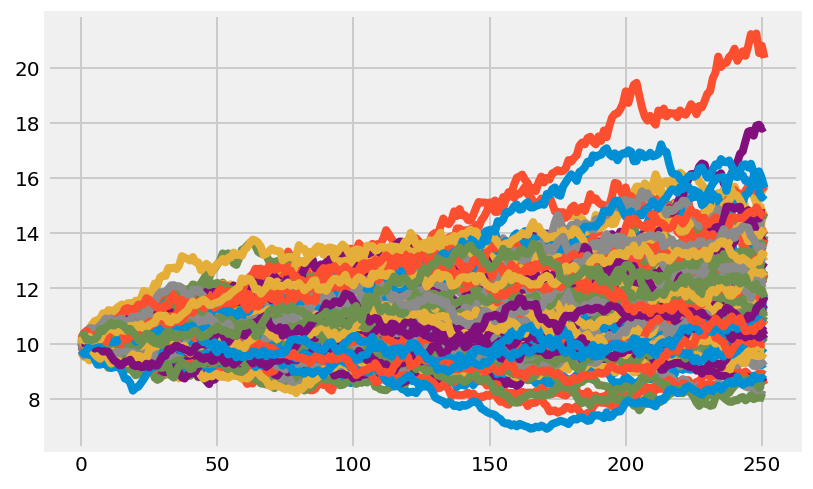

In [388]:
# Loop through 100 simulations
for i in range(0,100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [389]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -2.64 %
